In [1]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#### Result comparison between different machines

In [2]:
filenames ={#'Euler'     : '../data/Bentheimer300/Euler_test.dat',
            #'Ubuntu'    : '../data/Bentheimer300/Ubuntu_test.dat',
            #'DWM'       : '../data/Bentheimer300/DWM_test.txt',
            'Eulerdiff' : '../data/Bentheimer300/sl_out_M0_DM1.0E-9_SLSM200_TMAX0.0E2_CSF5.dat'}
for key in filenames :
    with open(filenames[key], 'r') as f:
        lines = (line for line in f if len(line)>11)
        dataDNS = np.genfromtxt(lines)
        uxDNS = dataDNS[:,4]
        Umean = np.mean(uxDNS)
        print(key + '\t: Number of points loaded : '+str(np.shape(dataDNS))+', Ux mean : '+str(Umean))
del lines, dataDNS, uxDNS;

Eulerdiff	: Number of points loaded : (584351, 10), Ux mean : 2.04617333710426e-05


In [11]:
#filename = '../data/Bentheimer300/Euler_test.dat'  #Data from Euler
#filename = '../data/Bentheimer300/Ubuntu_test.dat'  #Data from Ubuntu
#filename = '../data/Bentheimer300/DWM_test.txt' #Data from DWM
filename = filenames['Eulerdiff']
with open(filename, 'r') as f:
    lines = (line for line in f if len(line)>11)
    dataDNS = np.genfromtxt(lines)
dDNS = 3
tDNS=dataDNS[:,0]
NtDNS=len(tDNS)
xDNS  = dataDNS[:,1]
yDNS  = dataDNS[:,2]
zDNS  = dataDNS[:,3]
uxDNS = dataDNS[:,4]
uyDNS = dataDNS[:,5]
uzDNS = dataDNS[:,6]

Umean = np.mean(uxDNS)
vDNS  = np.log(np.sqrt(uxDNS**2 + uyDNS**2 + uzDNS**2)/Umean) #Log velocity magnitude

del dataDNS, uxDNS, uyDNS, uzDNS; #free some memory
print('Number of points loaded : '+str(NtDNS)+', Ux mean : '+str(Umean))

Number of points loaded : 584351, Ux mean : 2.04617333710426e-05


C:\Users\Antoine\Documents\prog\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


In [7]:
#dt array from DNS
Np_ssl = 10000 #Number of points to load (usually smaller than NtDNS for sake of performance)
dtDNS = [t1-t0 for (t1,t0) in zip(tDNS[range(1,Np_ssl)],tDNS[range(Np_ssl-1)])] #DNS time step array
dtDNS_ssl = np.array([t1-t0 for (t1,t0) in zip(tDNS[range(1,Np_ssl)],tDNS[range(Np_ssl-1)]) if t1 > t0]) #Single s.l. dt array
Nt_ssl = len(dtDNS_ssl)
print('Number of single s.l. points : '+str(Nt_ssl))

Number of single s.l. points : 9979


In [8]:
#single s.l. Time array
tDNS_ssl = np.zeros(Nt_ssl)
T = 0
for i in range(Nt_ssl) :
    tDNS_ssl[i] = T
    T += dtDNS_ssl[i]

xDNS_ssl = np.array([x for (x,dt) in zip(xDNS,dtDNS) if dt > 0])
yDNS_ssl = np.array([x for (x,dt) in zip(yDNS,dtDNS) if dt > 0])
zDNS_ssl = np.array([x for (x,dt) in zip(zDNS,dtDNS) if dt > 0])
vDNS_ssl = np.array([v for (v,dt) in zip(vDNS,dtDNS) if dt > 0]) #single streamline log velocity magnitude
del xDNS, yDNS, zDNS, vDNS;

<IPython.core.display.Javascript object>


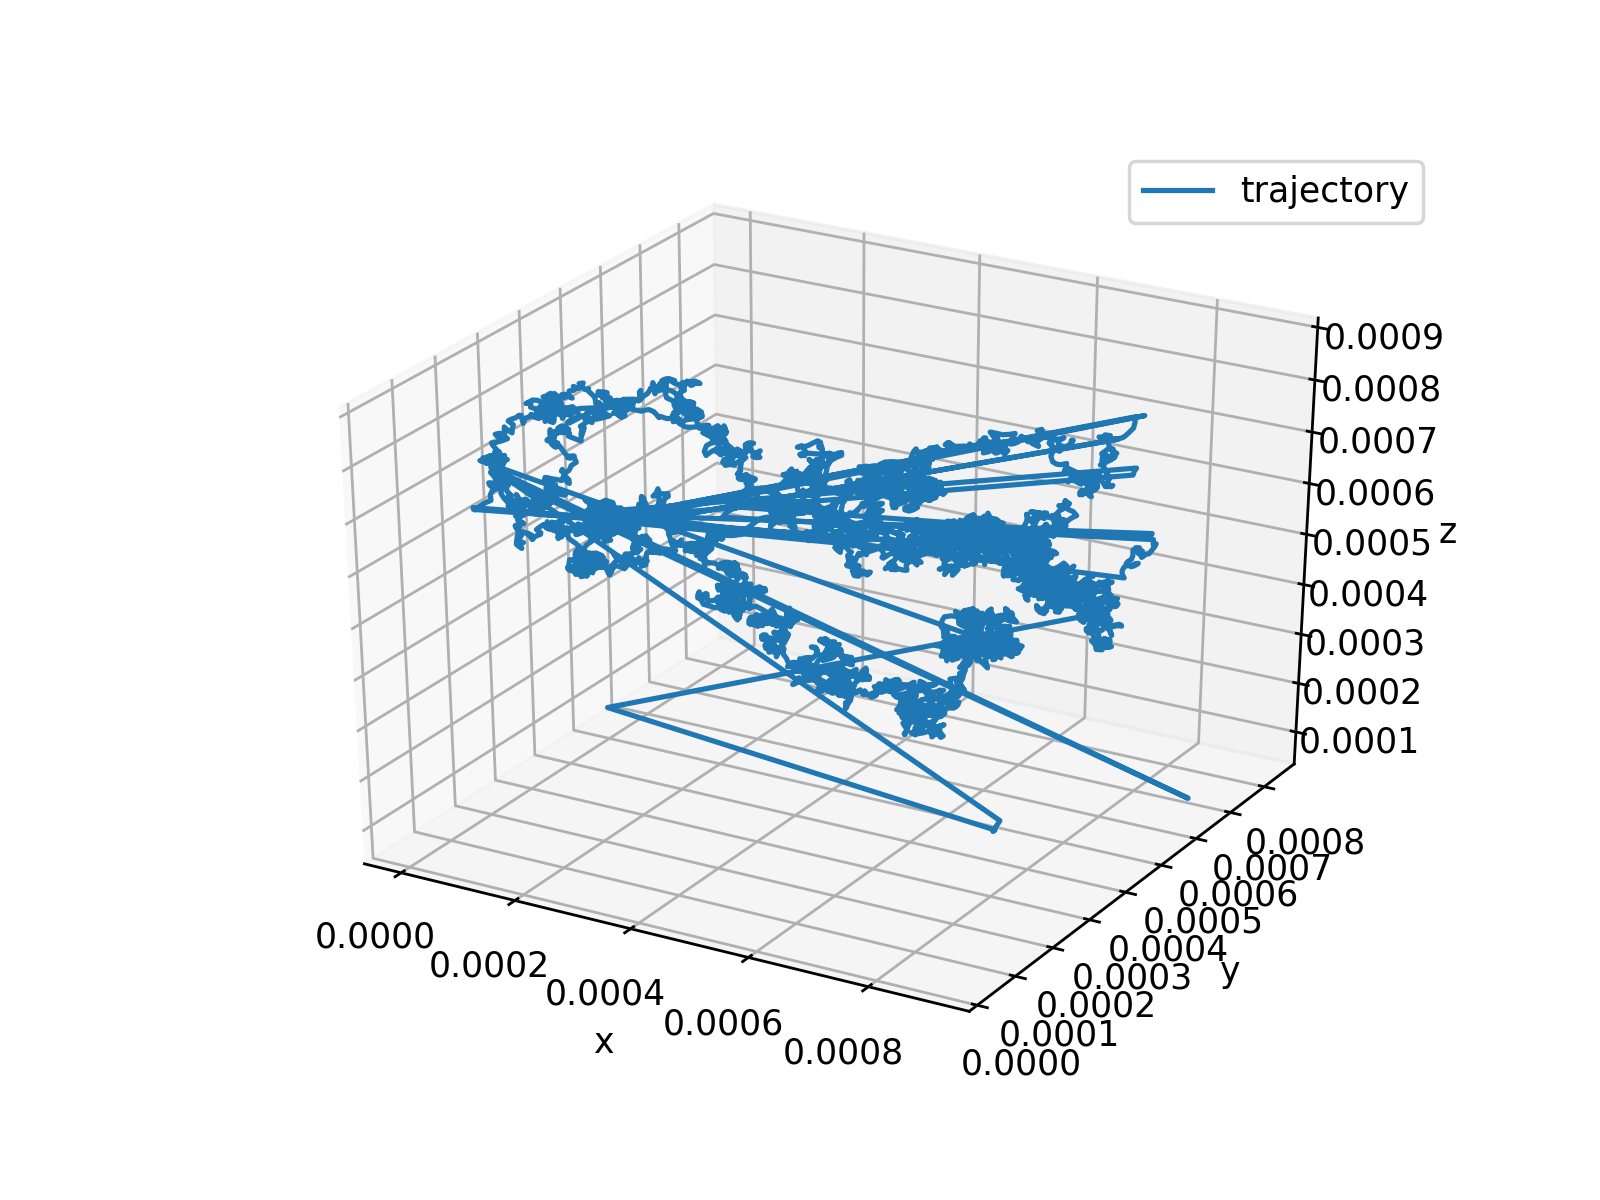

In [10]:
fig3D = plt.figure()
ax3D = fig3D.gca(projection='3d')
ax3D.plot(xDNS_ssl, yDNS_ssl, zDNS_ssl, zdir = 'z',label='trajectory')
ax3D.legend()
ax3D.set_xlabel('x')
ax3D.set_ylabel('y')
ax3D.set_zlabel('z')
plt.show()

In [3]:
#data = np.loadtxt('../data/Bentheimer300/sl_out_M0_DM0.0E-9_SLSM200_TMAX0.0E2_CSF1.dat',skiprows=1)
data = np.loadtxt('../data/Bentheimer300/Euler_test.dat',skiprows=1)

d = 3

t=data[:,0]
Nt=len(t)
print('Nt = '+str(Nt))
x  = data[:,1]
y  = data[:,2]
z  = data[:,3]
ux = data[:,4]
uy = data[:,5]
uz = data[:,6]
ax = data[:,7]
ay = data[:,8]
az = data[:,9]

Nt = 613


<IPython.core.display.Javascript object>


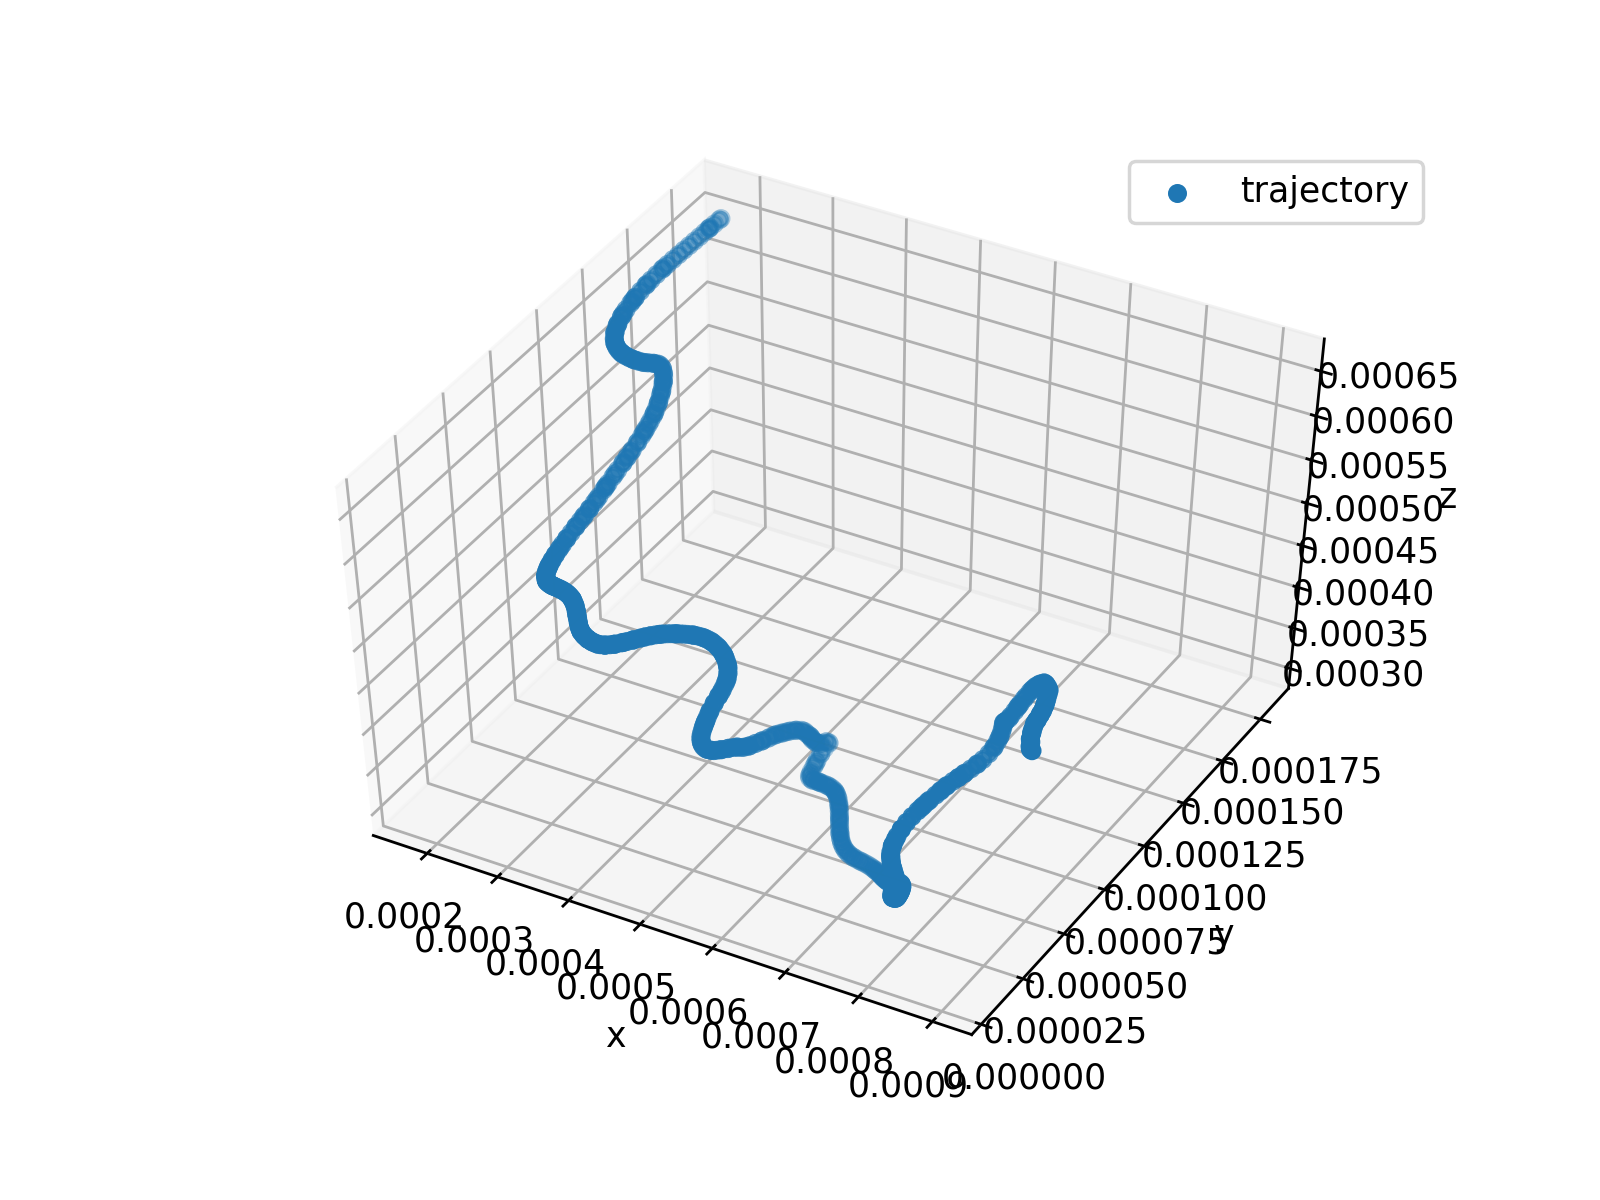

In [34]:
fig3D = plt.figure()
ax3D = fig3D.gca(projection='3d')
ax3D.scatter(x, y, z, zdir = 'z',label='trajectory')
ax3D.legend()
ax3D.set_xlabel('x')
ax3D.set_ylabel('y')
ax3D.set_zlabel('z')
plt.show()

POSITION

<IPython.core.display.Javascript object>


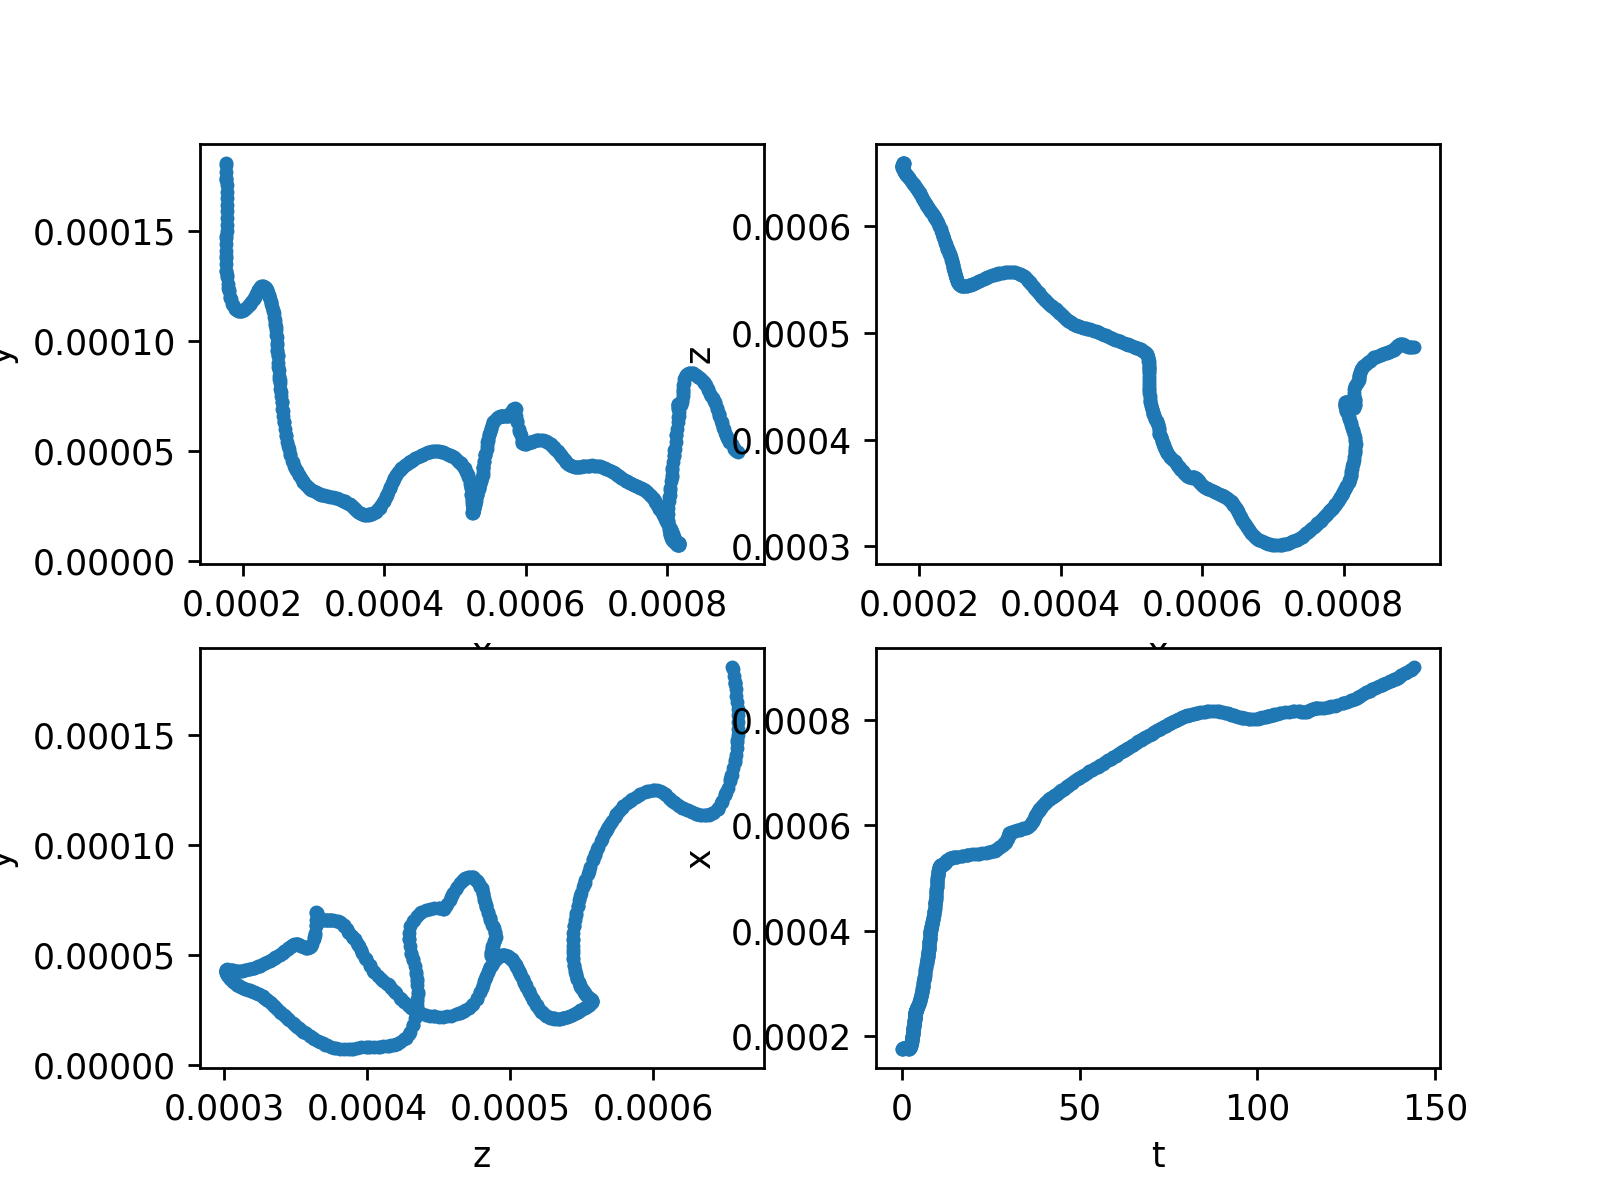

In [28]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x,y,'--.')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,1].plot(x,z,'--.')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('z')
axs[1,0].plot(z,y,'--.')
axs[1,0].set_xlabel('z')
axs[1,0].set_ylabel('y')
axs[1,1].plot(t,x,'--.')
axs[1,1].set_xlabel('t')
axs[1,1].set_ylabel('x')
plt.show()

VELOCITY components

<IPython.core.display.Javascript object>


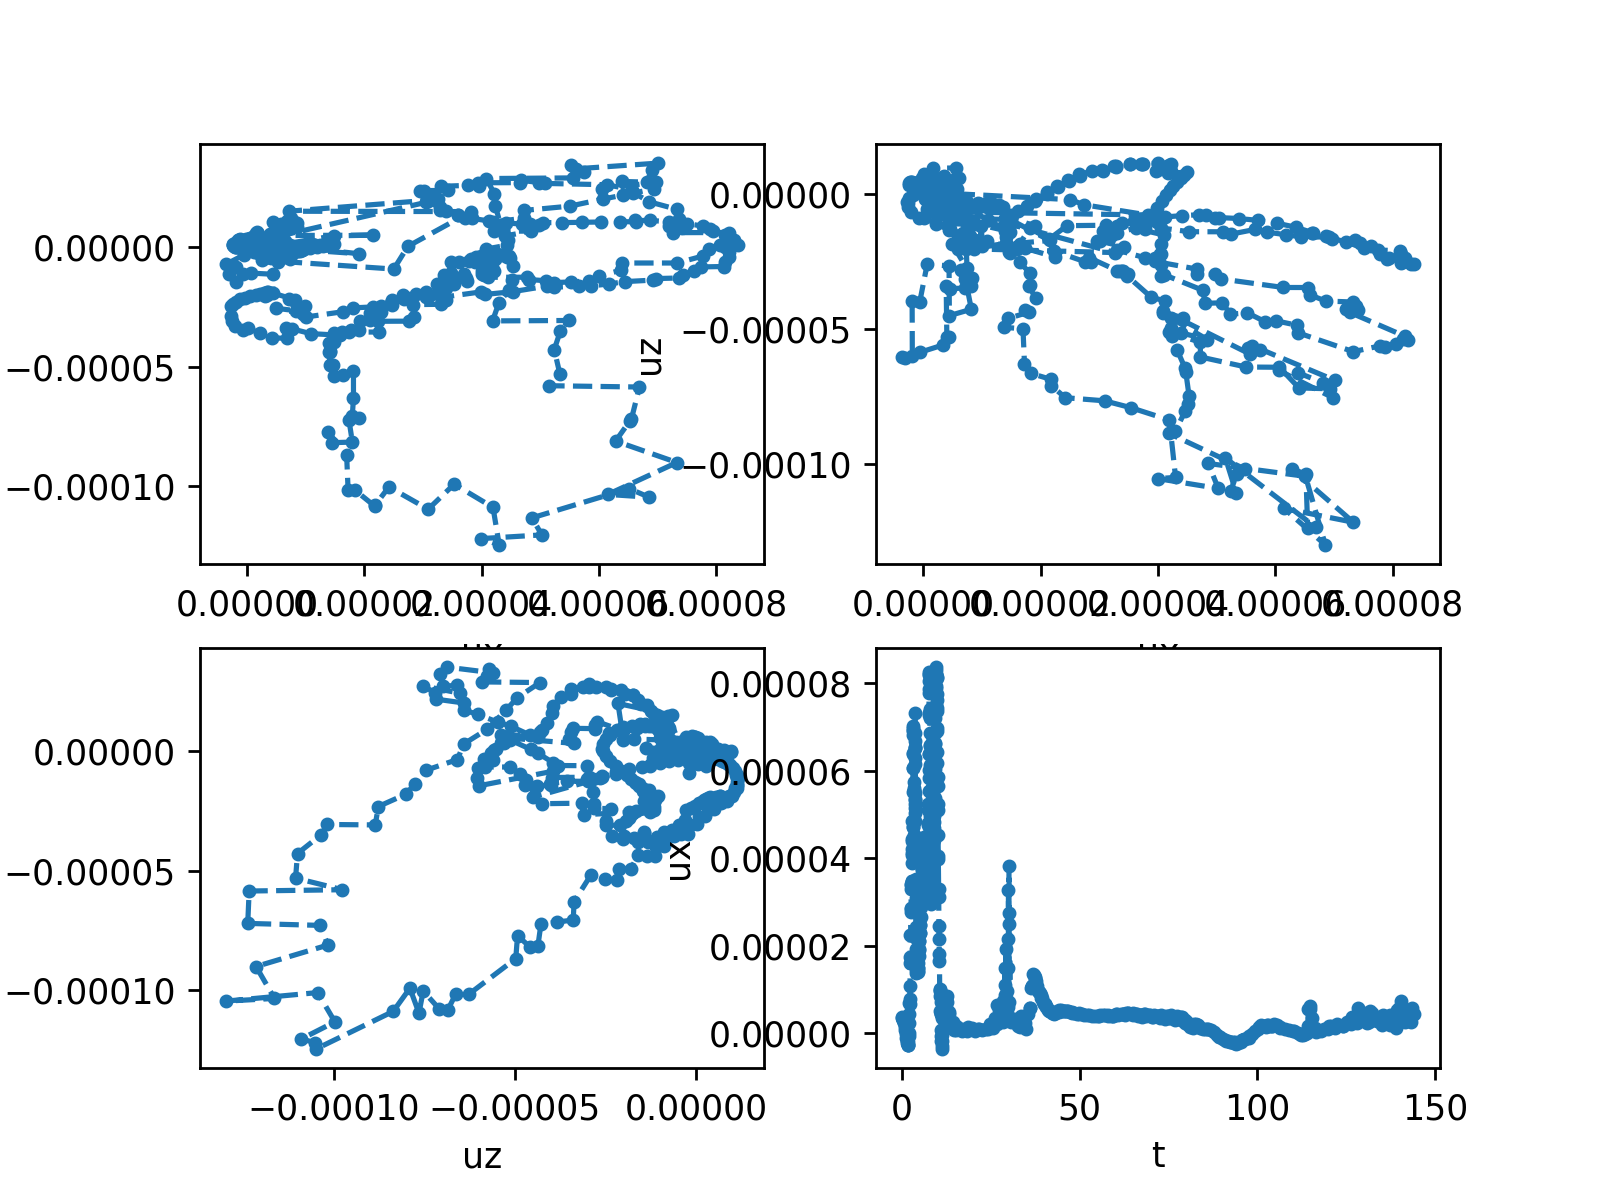

In [29]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(ux,uy,'--.')
axs[0,0].set_xlabel('ux')
axs[0,0].set_ylabel('uy')
axs[0,1].plot(ux,uz,'--.')
axs[0,1].set_xlabel('ux')
axs[0,1].set_ylabel('uz')
axs[1,0].plot(uz,uy,'--.')
axs[1,0].set_xlabel('uz')
axs[1,0].set_ylabel('uy')
axs[1,1].plot(t,ux,'--.')
axs[1,1].set_xlabel('t')
axs[1,1].set_ylabel('ux')
plt.show()

VELOCITY log magnitude

<IPython.core.display.Javascript object>


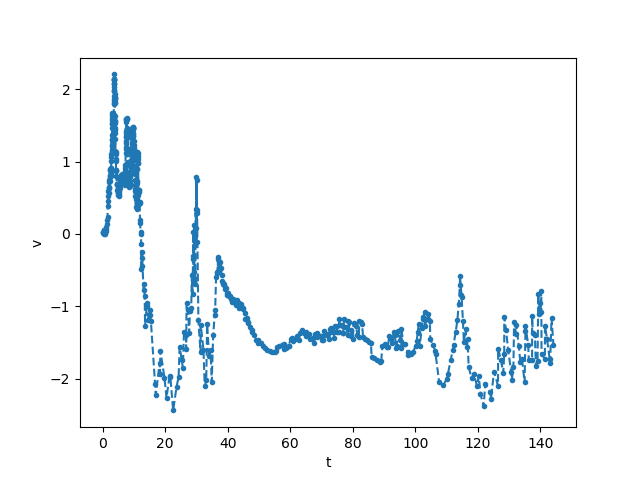

Text(0, 0.5, 'v')

In [12]:
fig, ax = plt.subplots(1,1)
U = ux.mean()
ax.plot(t,np.log(np.sqrt(ux**2+uy**2+uz**2)/U),'--.')
ax.set_xlabel('t')
ax.set_ylabel('v')

ACCELERATION

<IPython.core.display.Javascript object>


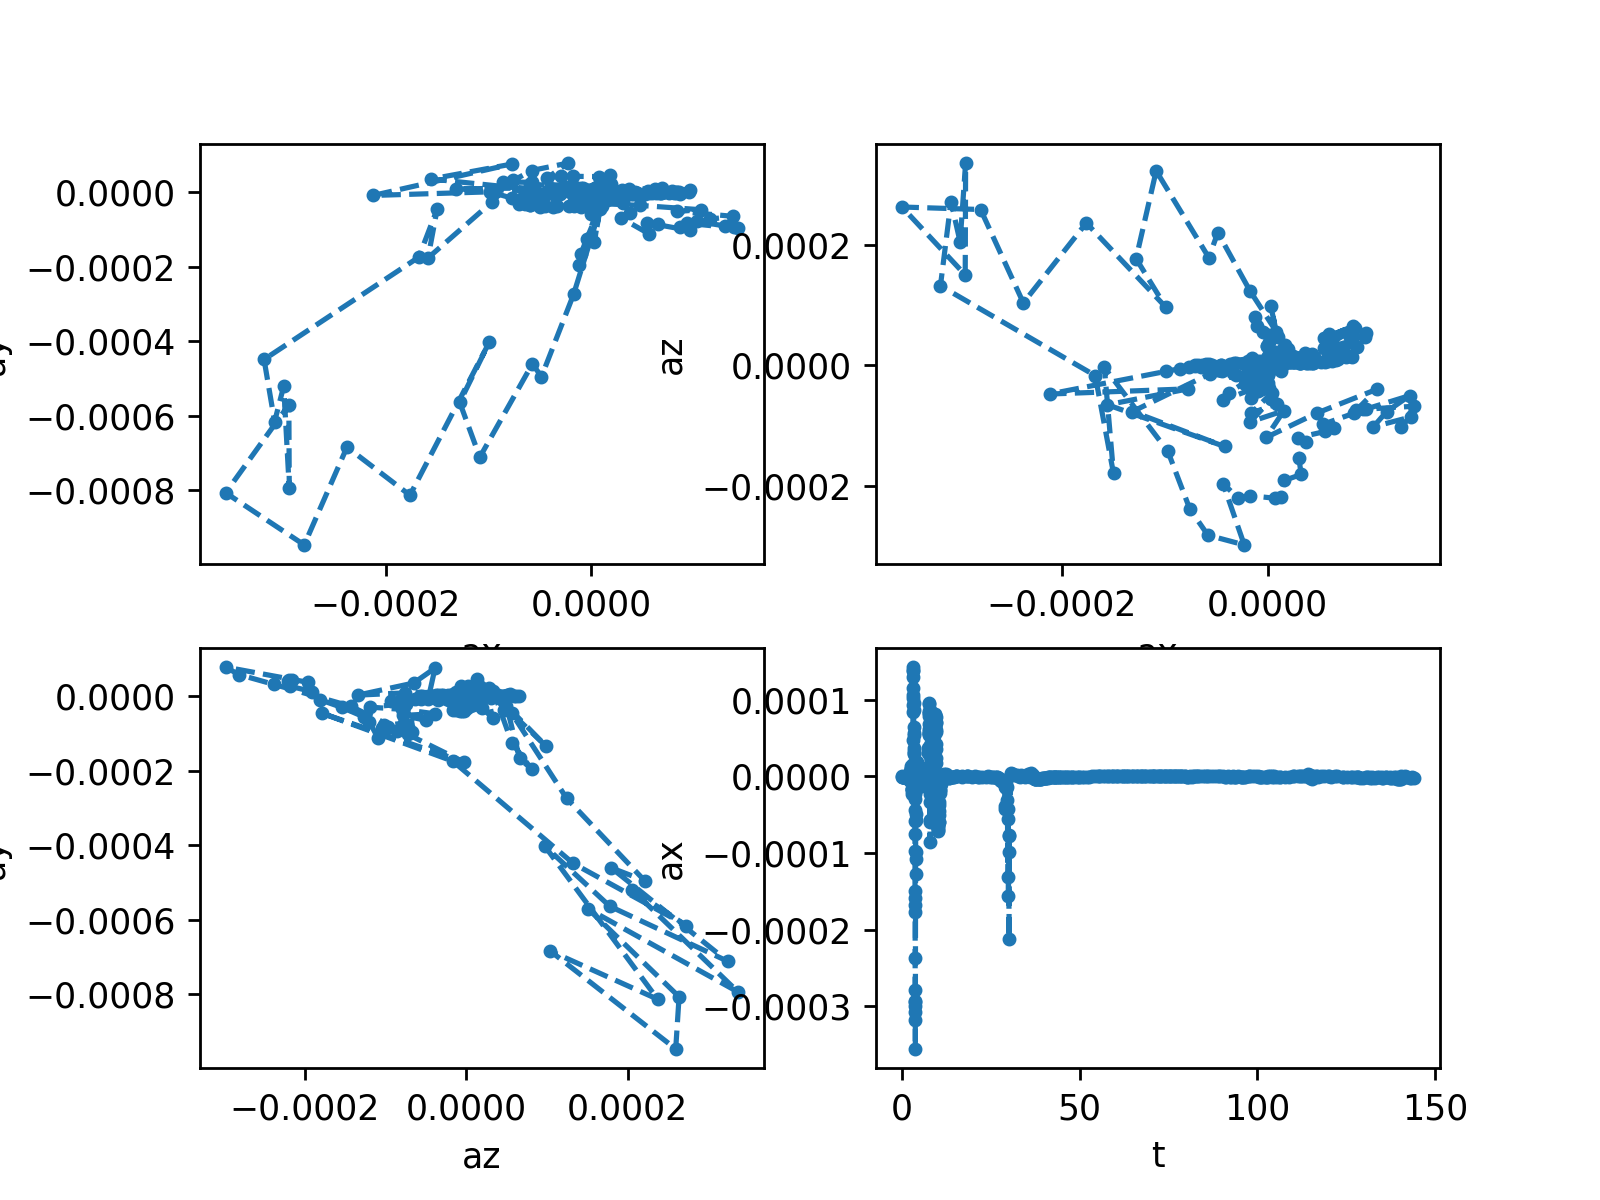

In [30]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(ax,ay,'--.')
axs[0,0].set_xlabel('ax')
axs[0,0].set_ylabel('ay')
axs[0,1].plot(ax,az,'--.')
axs[0,1].set_xlabel('ax')
axs[0,1].set_ylabel('az')
axs[1,0].plot(az,ay,'--.')
axs[1,0].set_xlabel('az')
axs[1,0].set_ylabel('ay')
axs[1,1].plot(t,ax,'--.')
axs[1,1].set_xlabel('t')
axs[1,1].set_ylabel('ax')
plt.show()

PDFs

<IPython.core.display.Javascript object>


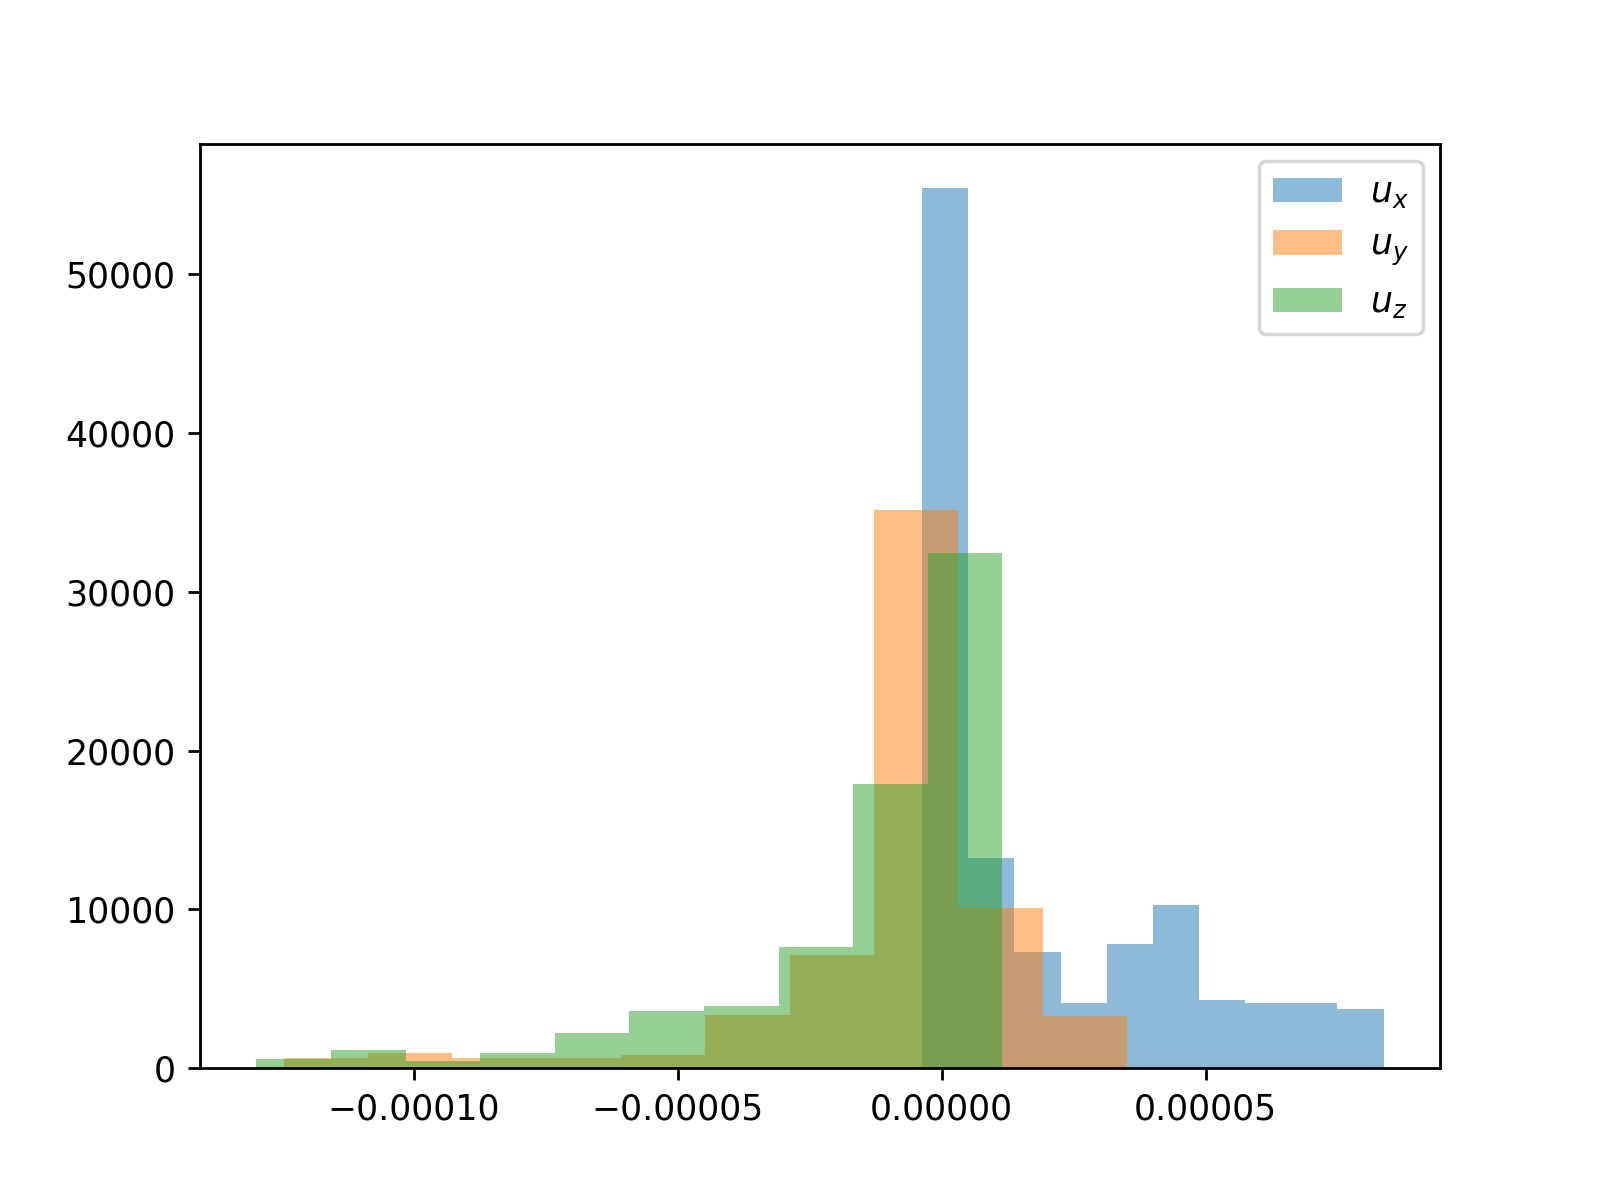

In [33]:
fig, axs = plt.subplots(1,1)
axs.hist(ux, normed = 'Density', alpha=0.5, label = r'$u_x$');
axs.hist(uy, normed = 'Density', alpha=0.5, label = r'$u_y$');
axs.hist(uz, normed = 'Density', alpha=0.5, label = r'$u_z$');
axs.legend();